A notebook to test calculating of SNR, SSIM, and MSE for a filter using a number of randomly generated additive noise problems

# Setup
Here we import the libraries we need

In [1]:
import matplotlib.pyplot as plt # plotting and showing images
import numpy as np # handling arrays
from skimage.io import imread # reading images
from skimage.measure import compare_ssim as ssim # structural similarity
mse = lambda img1, img2: np.sum(np.power(img1-img2,2))

# Load and Show Phantom

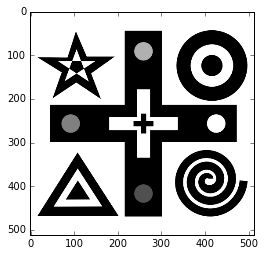

In [2]:
%matplotlib inline
d=np.mean(imread('data/testpattern.png'),2)
plt.imshow(d, cmap= 'gray')

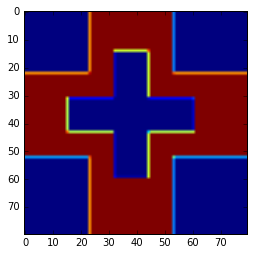

In [18]:
plt.imshow(d[220:300, 220:300]) # look for part of an image to calculate SNR

# Tasks
Evaluate a number of different filters using different noise levels and determine which works the best under which circumstances. The example is done for a uniform filter, and you job is to add 

 1. gaussian
 2. median 
 3. wavelet (advanced) 
 4. anisotropic diffusion (expert)

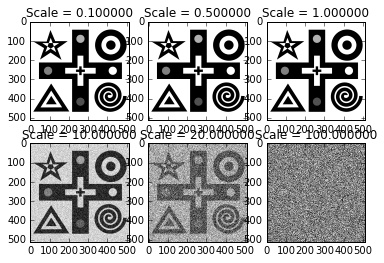

In [19]:
scales = [0.1, 0.5, 1, 10, 20, 100];

Ntests = 10;

# initialize arrays for results
mse1 = np.zeros((len(scales), Ntests), dtype = np.float32)
ssim1 = np.zeros((len(scales), Ntests), dtype = np.float32)
snr1 = np.zeros((len(scales), Ntests), dtype = np.float32)
from scipy.ndimage.filters import uniform_filter
current_filter = lambda img: uniform_filter(img, size = 5, mode = 'reflect')

plt.figure(1)
for i, c_scale in enumerate(scales):
    for j in range(Ntests):
        x = current_filter(d+c_scale*np.random.uniform(low = -c_scale, high = c_scale, size = d.shape))
        mse1[i,j]=mse(d,x);
        ssim1[i,j]=ssim(d,x);
        xx = x[220:300, 220:300]; # cut out a region for SNR computation
        snr1[i,j] = np.mean(xx)/np.std(xx)
    # Add some lines here to display the latest image in a subplot
    plt.subplot(2, 3 ,i+1)
    plt.imshow(x, cmap = 'gray')
    plt.title('Scale = {0:f}'.format(c_scale))    

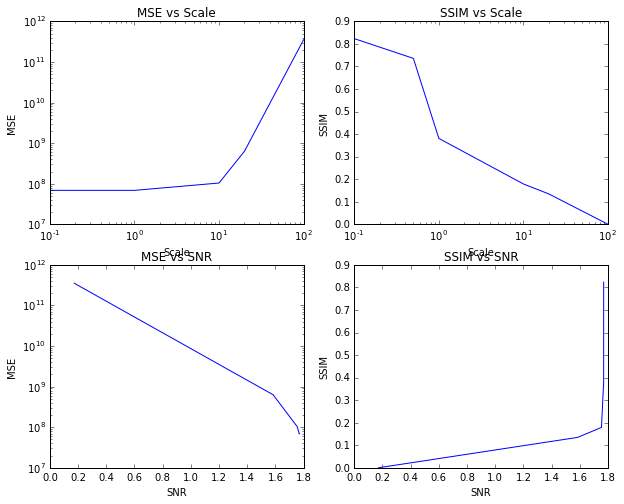

In [21]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(10, 8))
ax1.loglog(scales,np.mean(mse1,1)) # Add annotations for the plot and axes
ax1.set_title('MSE vs Scale')
ax1.set_xlabel('Scale')
ax1.set_ylabel('MSE')

ax2.semilogx(scales,np.mean(ssim1,1))
ax2.set_title('SSIM vs Scale')
ax2.set_xlabel('Scale')
ax2.set_ylabel('SSIM')

# make a version of the plot showing SNR instead of scale
ax3.semilogy(np.mean(snr1,1),np.mean(mse1,1)) # Add annotations for the plot and axes
ax3.set_title('MSE vs SNR')
ax3.set_xlabel('SNR')
ax3.set_ylabel('MSE')

ax4.plot(np.mean(snr1,1),np.mean(ssim1,1))
ax4.set_title('SSIM vs SNR')
ax4.set_xlabel('SNR')
ax4.set_ylabel('SSIM')

## Test run for Median Filter

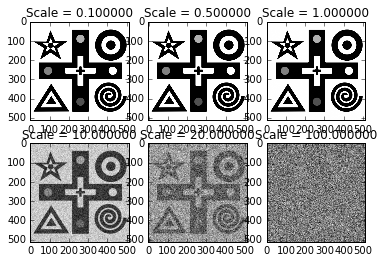

In [26]:
scales = [0.1, 0.5, 1, 10, 20, 100];

Ntests = 10;

# initialize arrays for results
mse2 = np.zeros((len(scales), Ntests), dtype = np.float32)
ssim2 = np.zeros((len(scales), Ntests), dtype = np.float32)
snr2 = np.zeros((len(scales), Ntests), dtype = np.float32)
from scipy.ndimage.filters import median_filter
current_filter = lambda img: median_filter(img, size = 5, mode = 'reflect')

plt.figure(2)
for i, c_scale in enumerate(scales):
    for j in range(Ntests):
        x = current_filter(d+c_scale*np.random.uniform(low = -c_scale, high = c_scale, size = d.shape))
        mse2[i,j]=mse(d,x);
        ssim2[i,j]=ssim(d,x);
        xx = x[220:300, 220:300]; # cut out a region for SNR computation
        snr2[i,j] = np.mean(xx)/np.std(xx)
    # Add some lines here to display the latest image in a subplot
    plt.subplot(2, 3 ,i+1)
    plt.imshow(x, cmap = 'gray')
    plt.title('Scale = {0:f}'.format(c_scale))    

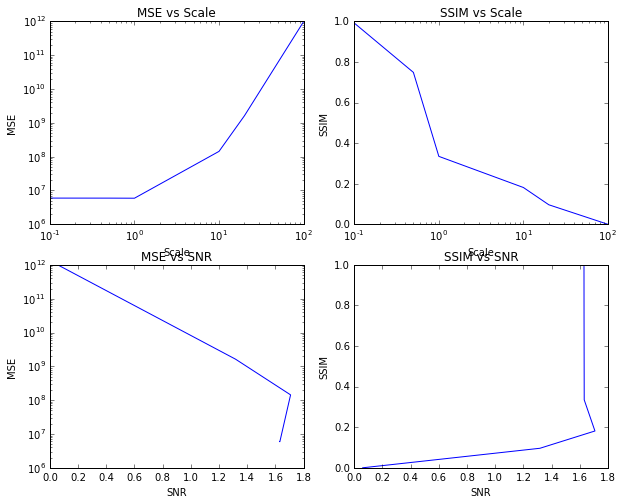

In [27]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(10, 8))
ax1.loglog(scales,np.mean(mse2,1)) # Add annotations for the plot and axes
ax1.set_title('MSE vs Scale')
ax1.set_xlabel('Scale')
ax1.set_ylabel('MSE')

ax2.semilogx(scales,np.mean(ssim2,1))
ax2.set_title('SSIM vs Scale')
ax2.set_xlabel('Scale')
ax2.set_ylabel('SSIM')

# make a version of the plot showing SNR instead of scale
ax3.semilogy(np.mean(snr2,1),np.mean(mse2,1)) # Add annotations for the plot and axes
ax3.set_title('MSE vs SNR')
ax3.set_xlabel('SNR')
ax3.set_ylabel('MSE')

ax4.plot(np.mean(snr2,1),np.mean(ssim2,1))
ax4.set_title('SSIM vs SNR')
ax4.set_xlabel('SNR')
ax4.set_ylabel('SSIM')

## Test run for Gaussian Filter

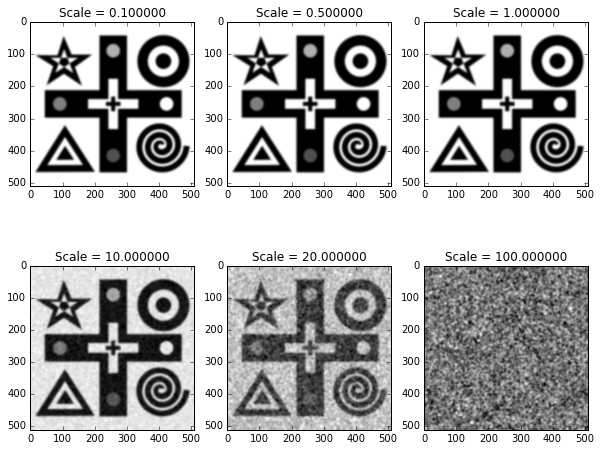

In [33]:
scales = [0.1, 0.5, 1, 10, 20, 100];

Ntests = 10;

# initialize arrays for results
mse3 = np.zeros((len(scales), Ntests), dtype = np.float32)
ssim3 = np.zeros((len(scales), Ntests), dtype = np.float32)
snr3 = np.zeros((len(scales), Ntests), dtype = np.float32)
from scipy.ndimage.filters import gaussian_filter
current_filter = lambda img: gaussian_filter(img, sigma = (3, 3), order = (0, 0), mode = 'reflect')

plt.figure(3, figsize = (10,8))
for i, c_scale in enumerate(scales):
    for j in range(Ntests):
        x = current_filter(d+c_scale*np.random.uniform(low = -c_scale, high = c_scale, size = d.shape))
        mse3[i,j]=mse(d,x);
        ssim3[i,j]=ssim(d,x);
        xx = x[220:300, 220:300]; # cut out a region for SNR computation
        snr3[i,j] = np.mean(xx)/np.std(xx)
    # Add some lines here to display the latest image in a subplot
    plt.subplot(2, 3 ,i+1)
    plt.imshow(x, cmap = 'gray')
    plt.title('Scale = {0:f}'.format(c_scale))    

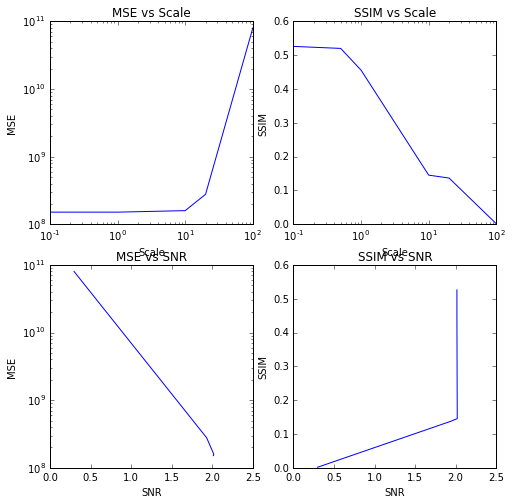

In [35]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(8, 8))
ax1.loglog(scales,np.mean(mse3,1)) # Add annotations for the plot and axes
ax1.set_title('MSE vs Scale')
ax1.set_xlabel('Scale')
ax1.set_ylabel('MSE')

ax2.semilogx(scales,np.mean(ssim3,1))
ax2.set_title('SSIM vs Scale')
ax2.set_xlabel('Scale')
ax2.set_ylabel('SSIM')

# make a version of the plot showing SNR instead of scale
ax3.semilogy(np.mean(snr3,1),np.mean(mse3,1)) # Add annotations for the plot and axes
ax3.set_title('MSE vs SNR')
ax3.set_xlabel('SNR')
ax3.set_ylabel('MSE')

ax4.plot(np.mean(snr3,1),np.mean(ssim3,1))
ax4.set_title('SSIM vs SNR')
ax4.set_xlabel('SNR')
ax4.set_ylabel('SSIM')

## Test run for Wavelet Denoising

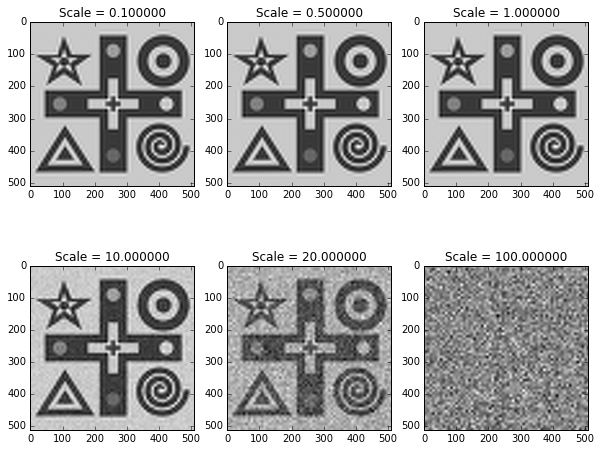

In [38]:
scales = [0.1, 0.5, 1, 10, 20, 100];

Ntests = 10;

# initialize arrays for results
mse4 = np.zeros((len(scales), Ntests), dtype = np.float32)
ssim4 = np.zeros((len(scales), Ntests), dtype = np.float32)
snr4 = np.zeros((len(scales), Ntests), dtype = np.float32)

import pywt
def current_filter(img, wavelet, level):
    coefs = pywt.wavedec2(img, wavelet = wavelet, mode='reflect', level = level)
    cnst = 0.6745 # some apparetnly random constant
    sigma = np.median(np.abs(coefs[0]))/0.6745
    threshold = sigma*np.sqrt(2*np.log(img.size))
    coefs_dns = coefs[:]
    # denoise coefficients except n-level approximate coeficients
    coefs_dns[1:] =(pywt.threshold(x, threshold) for x in coefs[1:])
    x = pywt.waverec2(coefs_dns, wavelet = wavelet, mode = 'reflect')
    return x

img = np.zeros(d.shape)
wvlt = 'sym6'; lvl = 3;

plt.figure(3, figsize = (10,8))
for i, c_scale in enumerate(scales):
    for j in range(Ntests):
        img = d+c_scale*np.random.uniform(low = -c_scale, high = c_scale, size = d.shape)
        x = current_filter(img, wavelet = wvlt, level = lvl)
        mse4[i,j]=mse(d,x);
        ssim4[i,j]=ssim(d,x);
        xx = x[220:300, 220:300]; # cut out a region for SNR computation
        snr4[i,j] = np.mean(xx)/np.std(xx)
    # Add some lines here to display the latest image in a subplot
    plt.subplot(2, 3 ,i+1)
    plt.imshow(x, cmap = 'gray')
    plt.title('Scale = {0:f}'.format(c_scale))    

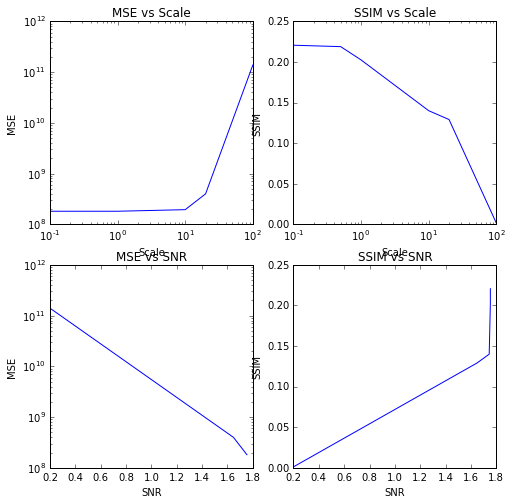

In [39]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(8, 8))
ax1.loglog(scales,np.mean(mse4,1)) # Add annotations for the plot and axes
ax1.set_title('MSE vs Scale')
ax1.set_xlabel('Scale')
ax1.set_ylabel('MSE')

ax2.semilogx(scales,np.mean(ssim4,1))
ax2.set_title('SSIM vs Scale')
ax2.set_xlabel('Scale')
ax2.set_ylabel('SSIM')

# make a version of the plot showing SNR instead of scale
ax3.semilogy(np.mean(snr4,1),np.mean(mse4,1)) # Add annotations for the plot and axes
ax3.set_title('MSE vs SNR')
ax3.set_xlabel('SNR')
ax3.set_ylabel('MSE')

ax4.plot(np.mean(snr4,1),np.mean(ssim4,1))
ax4.set_title('SSIM vs SNR')
ax4.set_xlabel('SNR')
ax4.set_ylabel('SSIM')

## Test run for Anisotropic Diffusion

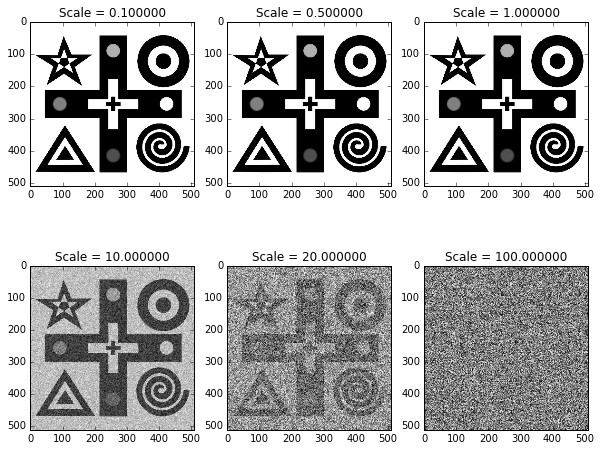

In [49]:
scales = [0.1, 0.5, 1, 10, 20, 100];

Ntests = 10;

# initialize arrays for results
mse5 = np.zeros((len(scales), Ntests), dtype = np.float32)
ssim5 = np.zeros((len(scales), Ntests), dtype = np.float32)
snr5 = np.zeros((len(scales), Ntests), dtype = np.float32)

import fastaniso
import warnings

def current_filter(img, kappa, gamma, stepsize = (1,1), niter = 10):
    x = fastaniso.anisodiff(img, niter, kappa, gamma, stepsize)
    return x

img = np.zeros(d.shape)
kappa = 50; gamma = 0.2
stepsize=(1,1); niter=10

plt.figure(5, figsize = (10,8))
for i, c_scale in enumerate(scales):
    for j in range(Ntests):
        img = d+c_scale*np.random.uniform(low = -c_scale, high = c_scale, size = d.shape)
        x = current_filter(img, kappa, gamma, stepsize, niter)
        x = x.astype(np.float64)
        mse5[i,j]=mse(d,x);
        ssim5[i,j]=ssim(d,x);
        xx = x[220:300, 220:300]; # cut out a region for SNR computation
        snr5[i,j] = np.mean(xx)/np.std(xx)
    # Add some lines here to display the latest image in a subplot
    plt.subplot(2, 3 ,i+1)
    plt.imshow(x, cmap = 'gray')
    plt.title('Scale = {0:f}'.format(c_scale))    

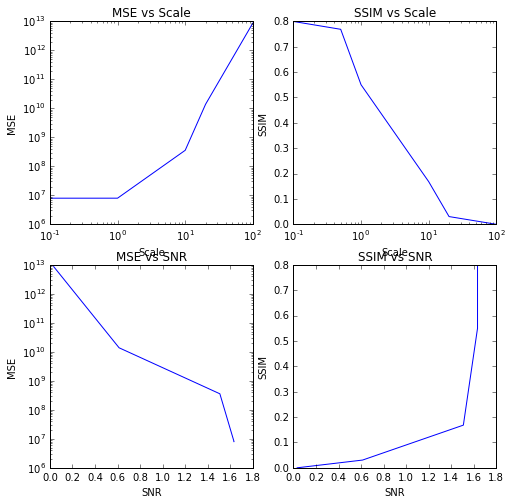

In [50]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(8, 8))
ax1.loglog(scales,np.mean(mse5,1)) # Add annotations for the plot and axes
ax1.set_title('MSE vs Scale')
ax1.set_xlabel('Scale')
ax1.set_ylabel('MSE')

ax2.semilogx(scales,np.mean(ssim5,1))
ax2.set_title('SSIM vs Scale')
ax2.set_xlabel('Scale')
ax2.set_ylabel('SSIM')

# make a version of the plot showing SNR instead of scale
ax3.semilogy(np.mean(snr5,1),np.mean(mse5,1)) # Add annotations for the plot and axes
ax3.set_title('MSE vs SNR')
ax3.set_xlabel('SNR')
ax3.set_ylabel('MSE')

ax4.plot(np.mean(snr5,1),np.mean(ssim5,1))
ax4.set_title('SSIM vs SNR')
ax4.set_xlabel('SNR')
ax4.set_ylabel('SSIM')